In [1]:
import skimage.io as sio
import numpy as np
import pandas as pd
import diff_classifier.aws as aws

In [2]:
rfolder = 'Tissue_Studies/04_30_18_JBSS_in_Tissue/test_images'
filename = '100nm_PEG_P1_S1_XY5_1.tif'
rname = '{}/{}'.format(rfolder, filename)
aws.download_s3(rname, filename, bucket_name='ccurtis.data')

In [3]:
raw = sio.imread(filename)

In [ ]:
dif = raw[1, :, :] - raw[0, :, :]

In [ ]:

d1 = np.zeros((512, 512))
d1[:, :] = raw[1, :, :]
d2 = np.zeros((512, 512))
d2[:, :] = raw[0, :, :]
d2[:, :] = raw[0, :, :]
dif = d1 - d2
mdif = np.mean(dif, axis=(0,1))

In [4]:
def imdif(rawim, f1=1, f2=0):
    imshape = np.shape(raw)
    d1 = np.zeros((imshape[1], imshape[2]))
    d1[:, :] = raw[f1, :, :]
    d2 = np.zeros((imshape[1], imshape[2]))
    d2[:, :] = raw[f2, :, :]
    dif = d1 - d2
    mdif = np.mean(dif, axis=(0,1))
    
    return mdif

In [ ]:
frames = np.shape(raw)[0]
acf = np.zeros(frames)

iacf = np.zeros(frames-1)
for frame in range(0, frames-1):
    value = imdif(raw, f1=frame+1, f2=frame)
    iacf[frame] = value


In [5]:
def onelag(rawim, interval=1):
    frames = np.shape(rawim)[0]
    
    iacf = np.zeros(frames - interval)
    for frame in range(0, frames - interval):
        value = imdif(raw, f1=frame+interval, f2=frame)
        iacf[frame] = value
        miacf = np.mean(iacf)
    return miacf

In [ ]:
def rawsignal(rawim):
    frames = np.shape(rawim)[0]
    

In [ ]:
numpy.correlate(x, x, mode='same') 

In [ ]:
sio.imshow(raw[0, :, :])

In [35]:
scaledim = raw / np.max(raw, axis=(0, 1, 2))
test = scaledim[:, 100, 100]

In [29]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.shape[0]/2):]

In [36]:
autoc = autocorr(test)

In [33]:
autoc.shape

(651,)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

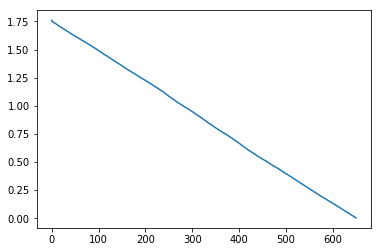

In [37]:
plt.plot(np.linspace(0, 650, 651), autoc)

In [ ]:
for i in range(0,512):
    for j in range(0,512):
        y = autocorr(scaledim[:, i, j])
        plt.plot(np.linspace(0, 650, 651), y)